In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  # Model type to be used
from tensorflow.keras import models

from tensorflow.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical

In [2]:
import glob

Positive = glob.glob('archive/Positive/*.jpg') 
Negative = glob.glob('archive/Negative/*.jpg')

positiveImgs = np.zeros((20000,100,100))
negativeImgs = np.zeros((20000,100,100))
c = 0

In [3]:
for positive, negative in zip(Positive, Negative):
    posImg = cv2.imread(positive, 0)
    negImg = cv2.imread(negative, 0)
    posImg = cv2.GaussianBlur(posImg,(3,3),1)
    negImg = cv2.GaussianBlur(negImg,(3,3),1)
    ret,th1 = cv2.threshold(posImg,90,255,cv2.THRESH_BINARY_INV)
    ret,th2 = cv2.threshold(negImg,60,255,cv2.THRESH_BINARY_INV)
    img1 = cv2.resize(th1, (100, 100), interpolation = cv2.INTER_LINEAR)
    img2 = cv2.resize(th2, (100, 100), interpolation = cv2.INTER_LINEAR)
    img1 = img1.reshape(1, 100 , 100)
    img2 = img2.reshape(1, 100 , 100)
    positiveImgs[c] = img1
    negativeImgs[c] = img2
    c += 1

In [4]:
positiveLabel = np.ones((20000,1), int)
negativeLabel = np.zeros((20000,1), int)

In [5]:
imgs = np.append(positiveImgs, negativeImgs, axis = 0)

In [6]:
labels = np.append(positiveLabel, negativeLabel, axis = 0)

In [7]:
from sklearn.utils import shuffle

X , Y = shuffle(imgs,labels)

In [8]:
X = X.reshape(40000, 10000)
X = X.astype('float32')   # change integers to 32-bit floating point numbers

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


x_train /= 255                        # normalize each value for each pixel for the entire vector for each input
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (32000, 10000)
Testing matrix shape (8000, 10000)


In [9]:
nb_classes = 2 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [10]:
model = Sequential()

model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(2))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [13]:
history=model.fit(x_train, Y_train, batch_size = 128, epochs=10, validation_split = 0.2)

Epoch 1/10
200/200 [==============================] - 7s 37ms/step - loss: 0.1367 - accuracy: 0.9819 - val_loss: 0.0305 - val_accuracy: 0.9934
Epoch 2/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0246 - accuracy: 0.9955 - val_loss: 0.0385 - val_accuracy: 0.9936
Epoch 3/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0196 - accuracy: 0.9969 - val_loss: 0.0358 - val_accuracy: 0.9934
Epoch 4/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0178 - accuracy: 0.9974 - val_loss: 0.0403 - val_accuracy: 0.9930
Epoch 5/10
200/200 [==============================] - 7s 37ms/step - loss: 0.0170 - accuracy: 0.9975 - val_loss: 0.0438 - val_accuracy: 0.9930
Epoch 6/10
200/200 [==============================] - 7s 36ms/step - loss: 0.0174 - accuracy: 0.9976 - val_loss: 0.0457 - val_accuracy: 0.9933
Epoch 7/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0169 - accuracy: 0.9976 - val_loss: 0.0485 - val_accuracy: 0.9933

In [14]:
score = model.evaluate(x_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

250/250 [==============================] - 1s 6ms/step - loss: 0.0453 - accuracy: 0.9948
Test score: 0.04527582973241806
Test accuracy: 0.9947500228881836


In [15]:
predict=model.predict(x_test) 
predicted_classes=np.argmax(predict,axis=1)

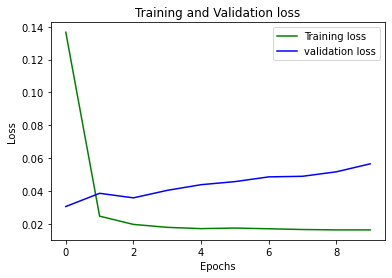

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

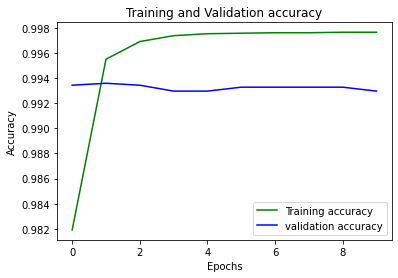

In [17]:
TrainAcc = history.history['accuracy']
valAcc = history.history['val_accuracy']
plt.plot(TrainAcc, 'g', label='Training accuracy')
plt.plot(valAcc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predicted_classes)

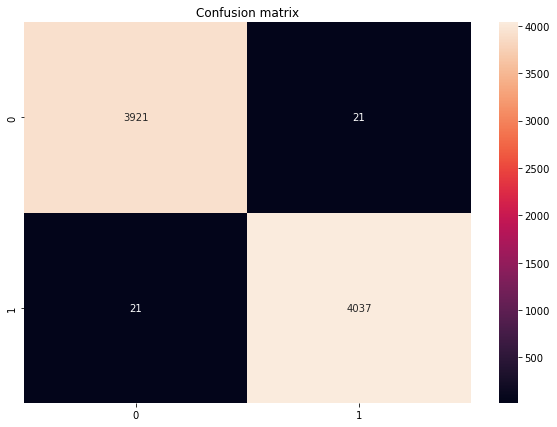

In [19]:
import pandas as pd
import seaborn as sns
df_cm = pd.DataFrame(confusion, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
plt.title("Confusion matrix")
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
sns.heatmap(df_cm, annot=True,fmt='d')

plt.show()

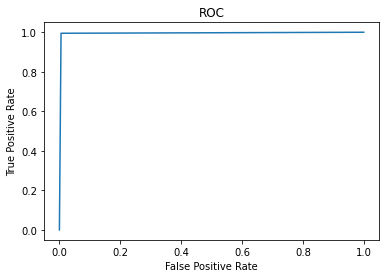

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicted_classes)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()